#**Forecasting COVID19**
## By: AIsteria
If you aren't in our group and you want to make your own edits to this notebook or expand on our project please make a copy of this! For more information on our project take a look at our google slides presentation @bit.ly/ForecastingCovidPresentation.

Thanks!
Nidhi, Niyathi, Audrey

## **Getting Set Up**

This is where we imported the necessary modules/libraries and opened the necessary csv files which had our data. Our data set includes data from January 22, 2020 to April 19, 2022. We also displayed the heads of each dataset below.

**Importing modules/libraries:**

In [ ]:
# numerical computations and manipulations
import numpy as np
import pandas as pd

# visualizing the data and the model
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# importing the model to allow for seperating data, and find accuracy, apart from training the model
# Simple and efficient tools for predictive data analysis
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# to do basic operations in the code
import random
# math stuff
import math
import operator
# time
import time
import datetime # manipulating dates and times
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Opening up the files from drive:**

We uploaded our data into drive. Here is the link to the dataset if you want to download it. 

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [ ]:
confirmed_cases = pd.read_csv('/content/drive/MyDrive/time_series_covid19_confirmed_global.csv')

In [ ]:
deaths_reported = pd.read_csv('/content/drive/MyDrive/time_series_covid19_deaths_global.csv')

In [ ]:
recovered_cases = pd.read_csv('/content/drive/MyDrive/time_series_covid19_recovered_global.csv')

**Viewing the first 5 rows of the datasets:**

We used the .head() function to do this:

In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178141,178257,178295,178352,178373,178387,178418,178457,178513,178574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274219,274272,274320,274376,274429,274462,274504,274520,274535,274606
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265727,265730,265731,265733,265738,265739,265739,265741,265746,265746
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40328,40328,40709,40709,40709,40709,40709,40709,40709,41013
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99287,99287


In [ ]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7675,7676,7676,7676,7676,7676,7678,7679,7680,7680
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3493,3494,3494,3495,3495,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Processing the data**
Our data was not pre-proessed so we processed our data in various ways as shown below. Feel free to look through the comments to understand the code better.

In [ ]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/11/22', '4/12/22', '4/13/22', '4/14/22', '4/15/22', '4/16/22',
       '4/17/22', '4/18/22', '4/19/22', '4/20/22'],
      dtype='object', length=824)

only dates and columns that have info of confirmed deaths and recovery cases

In [ ]:
confirmed = confirmed_cases.loc[:, cols[4]: cols[-1]]

In [ ]:
deaths = deaths_reported.loc[:, cols[4]: cols[-1]]

In [ ]:
recoveries = recovered_cases.loc[:, cols[4]: cols[-1]]

check the head of outbreak cases

In [ ]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,0,0,0,0,0,0,0,0,0,0,...,178141,178257,178295,178352,178373,178387,178418,178457,178513,178574
1,0,0,0,0,0,0,0,0,0,0,...,274219,274272,274320,274376,274429,274462,274504,274520,274535,274606
2,0,0,0,0,0,0,0,0,0,0,...,265727,265730,265731,265733,265738,265739,265739,265741,265746,265746
3,0,0,0,0,0,0,0,0,0,0,...,40328,40328,40709,40709,40709,40709,40709,40709,40709,41013
4,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99287,99287


In [ ]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,0,0,0,0,0,0,0,0,0,0,...,7675,7676,7676,7676,7676,7676,7678,7679,7680,7680
1,0,0,0,0,0,0,0,0,0,0,...,3493,3494,3494,3495,3495,3496,3496,3496,3496,3496
2,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [ ]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# finding total confirmed cases, death cases and recovery cases and append to 4 empty lists
# calculate the mortality rate death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
  confirmed_sum = confirmed[i].sum()
  death_sum = deaths[i].sum()
  recovered_sum = recoveries[i].sum()
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirmed_sum)
  total_recovered.append(recovered_sum)

In [ ]:
confirmed_sum

507046645

In [ ]:
death_sum

6207815

In [ ]:
recovered_sum

0

In [ ]:
world_cases

[557,
 657,
 944,
 1437,
 2120,
 2929,
 5580,
 6169,
 8237,
 9927,
 12038,
 16787,
 19887,
 23899,
 27644,
 30806,
 34400,
 37131,
 40162,
 42771,
 44814,
 45232,
 60384,
 66912,
 69055,
 71238,
 73273,
 75155,
 75655,
 76216,
 76846,
 78608,
 78990,
 79558,
 80412,
 81385,
 82730,
 84154,
 86030,
 88410,
 90393,
 93004,
 95329,
 98046,
 101976,
 106122,
 109972,
 114299,
 119108,
 126628,
 133383,
 146673,
 157617,
 168876,
 183394,
 198691,
 216348,
 243464,
 273008,
 305423,
 339895,
 382799,
 424883,
 475998,
 537412,
 601349,
 670495,
 726726,
 791975,
 870403,
 951968,
 1034275,
 1118277,
 1178363,
 1250388,
 1324899,
 1393878,
 1475875,
 1562641,
 1649186,
 1724605,
 1843412,
 1915034,
 1999558,
 2077371,
 2171785,
 2259607,
 2337796,
 2414457,
 2490365,
 2566638,
 2648575,
 2731191,
 2815227,
 2898734,
 2969606,
 3040528,
 3116384,
 3193728,
 3277569,
 3366610,
 3444963,
 3519124,
 3596509,
 3676148,
 3766682,
 3855363,
 3945796,
 4030370,
 4105623,
 4181599,
 4266956,
 4351289

convert all dates and the cases in the form of a numpy errors

In [ ]:
# convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [ ]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
world_cases

array([[      557],
       [      657],
       [      944],
       [     1437],
       [     2120],
       [     2929],
       [     5580],
       [     6169],
       [     8237],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23899],
       [    27644],
       [    30806],
       [    34400],
       [    37131],
       [    40162],
       [    42771],
       [    44814],
       [    45232],
       [    60384],
       [    66912],
       [    69055],
       [    71238],
       [    73273],
       [    75155],
       [    75655],
       [    76216],
       [    76846],
       [    78608],
       [    78990],
       [    79558],
       [    80412],
       [    81385],
       [    82730],
       [    84154],
       [    86030],
       [    88410],
       [    90393],
       [    93004],
       [    95329],
       [    98046],
       [   101976],
       [   106122],
       [   109972],
       [   114299],
       [   119108],
       [   126628],


In [ ]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2943],
       [   2997],
       [   3086],
       [   3160],
       [   3255],
       [   3348],
       [   3461],
       [   3566],
       [   3807],
       [   3997],
       [   4273],
       [   4618],
       [   4930],
       [   5420],
       [   5843],
       [   6496],
       [   7178],
       [  

In [ ]:
total_recovered

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1130],
       [     1493],
       [     2016],
       [     2617],
       [     3247],
       [     3949],
       [     4684],
       [     5151],
       [     6294],
       [     8061],
       [     9397],
       [    10867],
       [    12587],
       [    14352],
       [    16123],
       [    18181],
       [    18894],
       [    22892],
       [    23397],
       [    25229],
       [    27907],
       [    30388],
       [    33282],
       [    36714],
       [    39785],
       [    42721],
       [    45605],
       [    48227],
       [    51170],
       [    53796],
       [    55864],
       [    58358],
       [    60695],
       [    62495],
       [    64402],
       [    66999],


In [ ]:
#future forecasting for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
# convert all integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

In [ ]:
# for visualization start with data from 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0      178574
1      274606
2      265746
3       41013
4       99287
        ...  
279    656876
280       535
281     11818
282    318640
283    247336
Name: 4/20/22, Length: 284, dtype: int64

In [ ]:
latest_deaths

0      7680
1      3496
2      6874
3       153
4      1900
       ... 
279    5657
280       0
281    2148
282    3973
283    5466
Name: 4/20/22, Length: 284, dtype: int64

In [ ]:
latest_recoveries

0      0
1      0
2      0
3      0
4      0
      ..
264    0
265    0
266    0
267    0
268    0
Name: 4/20/22, Length: 269, dtype: int64

In [ ]:
# find list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [ ]:
# number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
  cases = latest_confirmed[confirmed_cases['Country/Region'] == i].sum()
  if cases > 0:
    country_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [ ]:
#number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 80801713 cases
India: 43049974 cases
Brazil: 30311969 cases
France: 28162002 cases
Germany: 23844536 cases
United Kingdom: 22060704 cases
Russia: 17838087 cases
Korea, South: 16674045 cases
Italy: 15858442 cases
Turkey: 15007364 cases
Spain: 11736893 cases
Vietnam: 10502590 cases
Argentina: 9060923 cases
Netherlands: 8209785 cases
Japan: 7484263 cases
Iran: 7212395 cases
Colombia: 6090246 cases
Indonesia: 6041269 cases
Poland: 5987341 cases
Mexico: 5730560 cases
Australia: 5563493 cases
Ukraine: 5040518 cases
Malaysia: 4409202 cases
Thailand: 4106230 cases
Austria: 4072410 cases
Israel: 4044987 cases
Belgium: 3998722 cases
Czechia: 3890336 cases
Portugal: 3757590 cases
South Africa: 3746424 cases
Philippines: 3683732 cases
Canada: 3669186 cases
Switzerland: 3596855 cases
Peru: 3557869 cases
Chile: 3535534 cases
Greece: 3259613 cases
Denmark: 3150617 cases
Romania: 2885221 cases
Slovakia: 2508400 cases
Sweden: 2495996 cases
Iraq: 2323707 cases
S

In [ ]:
# Find the list of unique provinces

unique_provinces = list(confirmed_cases['Province/State'].unique())
# those are countries, which aren't provices/states
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
  if i in unique_provinces:
    unique_provinces.remove(i)

In [ ]:
#Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
  cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
  if cases > 0:
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_provinces.remove(i)

In [ ]:
# number of cases per province/city/state

for i in range(len(unique_provinces)):
  print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 96854 cases
New South Wales: 2172295 cases
Northern Territory: 58703 cases
Queensland: 937536 cases
South Australia: 369418 cases
Tasmania: 125906 cases
Victoria: 1482004 cases
Western Australia: 320777 cases
Alberta: 558483 cases
British Columbia: 359002 cases
Grand Princess: 13 cases
Manitoba: 138271 cases
New Brunswick: 48197 cases
Newfoundland and Labrador: 42761 cases
Northwest Territories: 11763 cases
Nova Scotia: 72903 cases
Nunavut: 3531 cases
Ontario: 1239899 cases
Prince Edward Island: 32532 cases
Quebec: 1023433 cases
Repatriated Travellers: 13 cases
Saskatchewan: 134307 cases
Yukon: 4078 cases
Anhui: 1060 cases
Beijing: 1845 cases
Chongqing: 694 cases
Fujian: 2990 cases
Gansu: 681 cases
Guangdong: 6955 cases
Guangxi: 1566 cases
Guizhou: 179 cases
Hainan: 285 cases
Hebei: 1987 cases
Heilongjiang: 2760 cases
Henan: 2863 cases
Hong Kong: 1199706 cases
Hubei: 68396 cases
Hunan: 1346 cases
Inner Mongolia: 1694 cases
Jiangsu: 2156 cases
Jiangxi: 1129

In [ ]:
# handling any possible nan values

nan_indices = []

for i in range(len(unique_provinces)):
  if type(unique_provinces[i]) == float:
    nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
  unqiue_provinces.pop(i)
  province_confirmed_cases.pop(i)

##**Data Visualization**
After processing the data we created graphs to vizualize our data. As you can see below, there are a couple bar graphs showing the number of covid cases in different countries and and the number of covid cases in countries/regions. We used matplotlib to do this. 

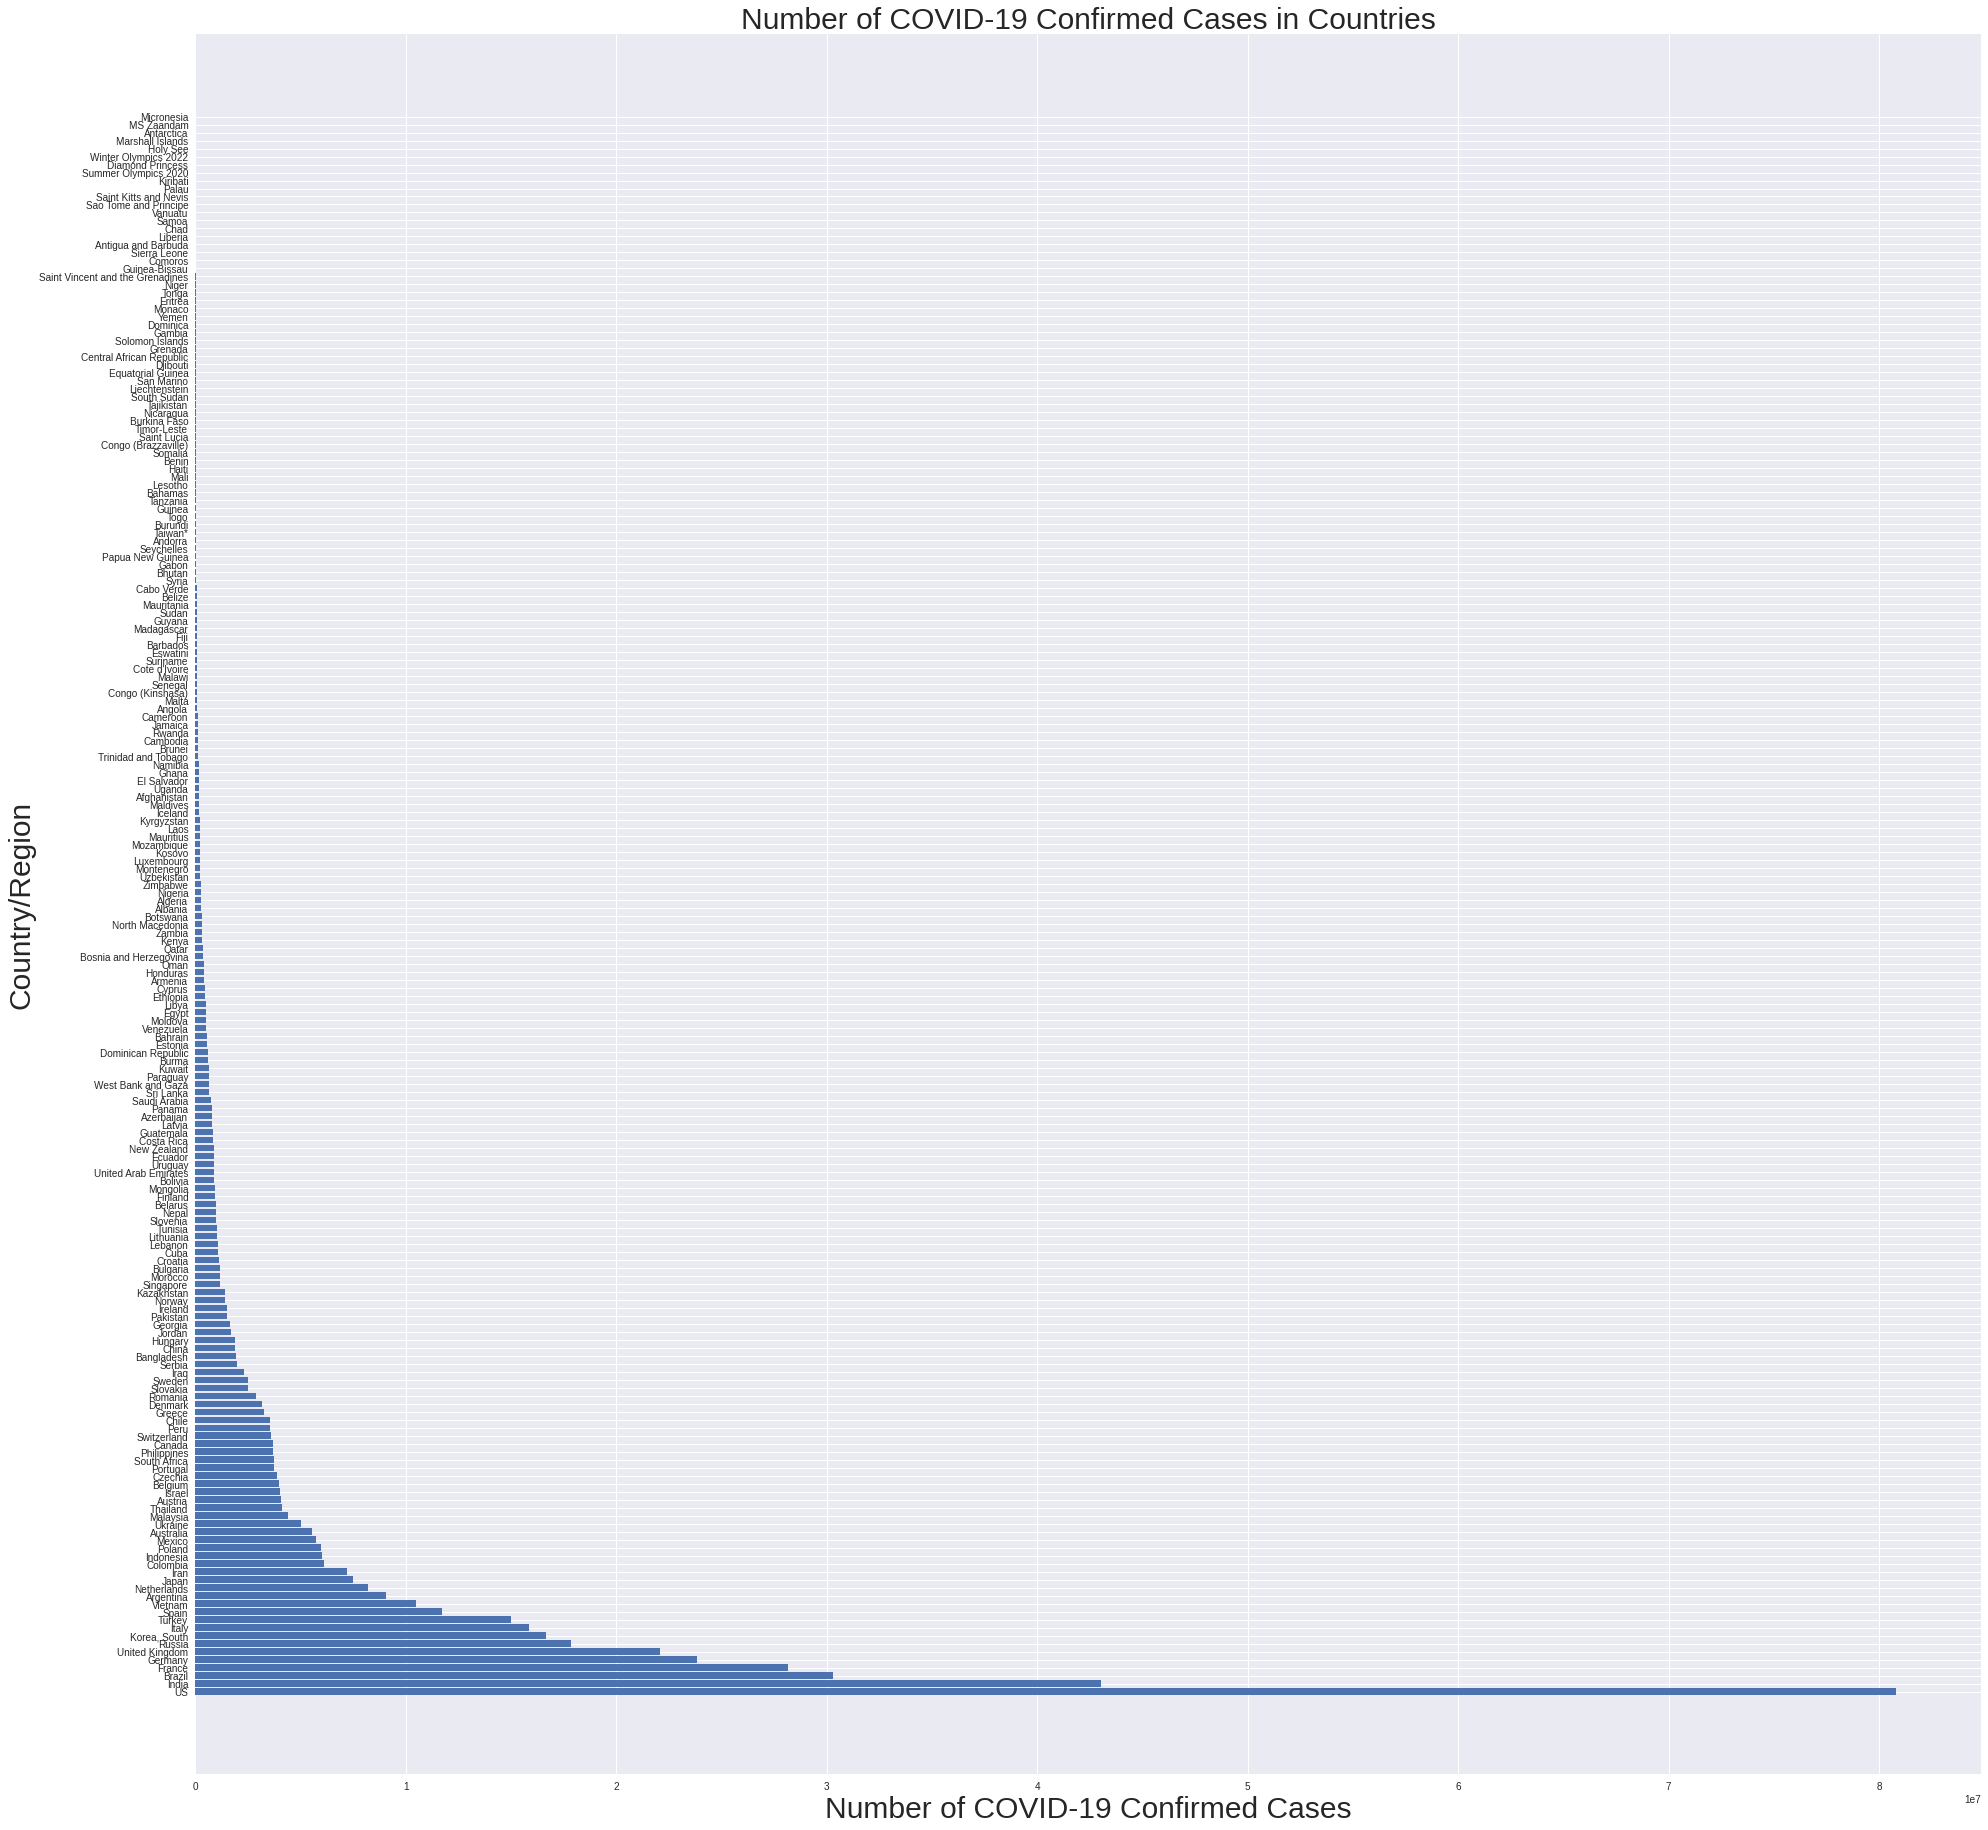

In [ ]:
#plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of COVID-19 Confirmed Cases in Countries', size = 30)
plt.xlabel('Number of COVID-19 Confirmed Cases', size = 30)
plt.ylabel('Country/Region', size = 30)
plt.show()

In [ ]:
# only show the 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[:10])
for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

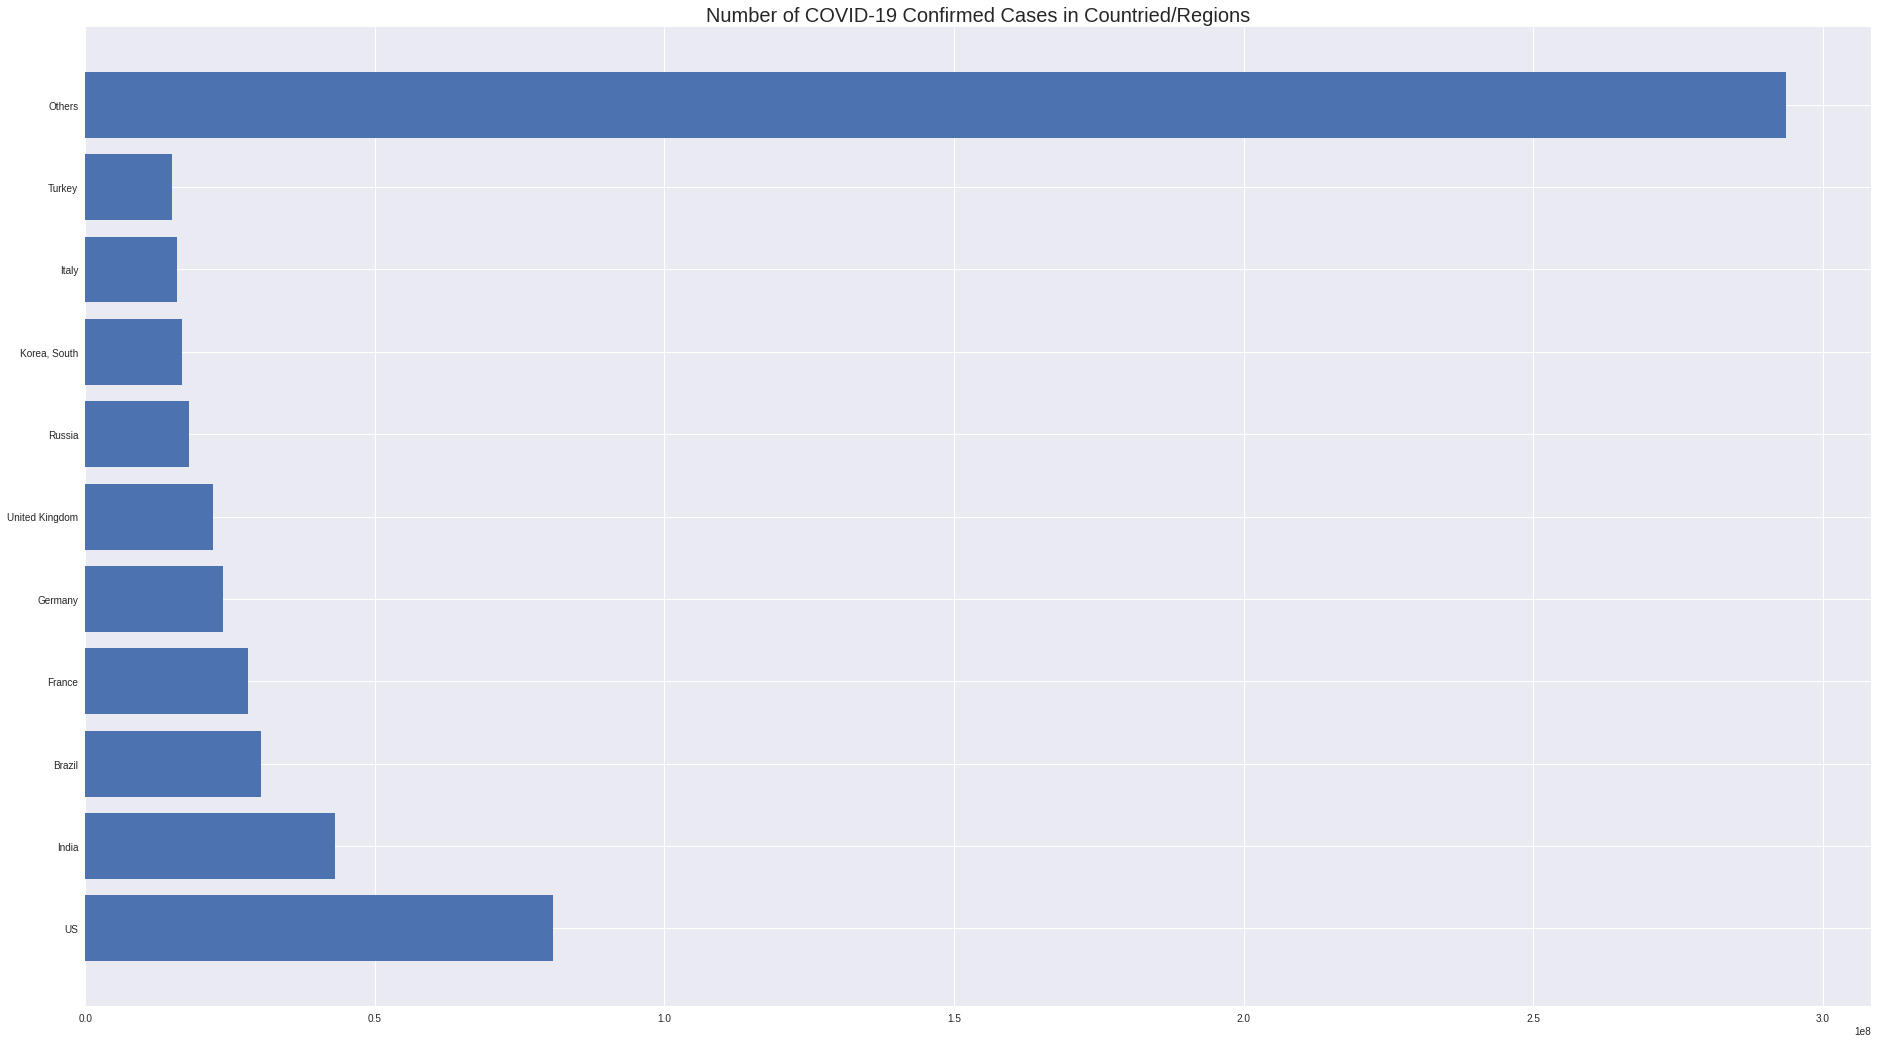

In [ ]:
#visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of COVID-19 Confirmed Cases in Countried/Regions', size=20)
plt.show()

##**Training with SVM (Support Vector Machines)**

Support Vector Machines is a better version of the perceptron algorithm which is typically used for classification. However, SVM can also be used to model regression. Simply put, the algorithm tries to make the distance between the extreme ends of the graph to the hyperplane as similar as possible. 

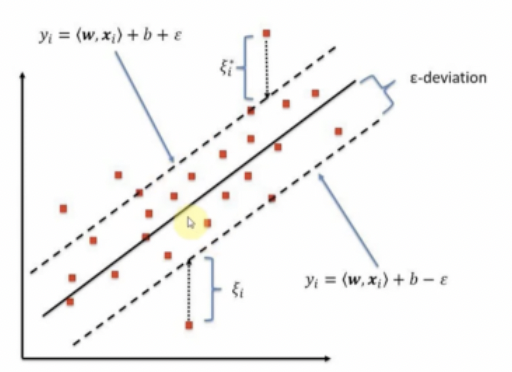

We used the support vector machine to predict the growth of COVID.

In [ ]:
# Building the SVM model -- SVM is basically like the Perceptron Algorithm except a little more sophisticated
# Picking the best parameters for the model
# Also doing the training

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
#kernel = ['poly', 'sigmoid', 'rbf']
#c = [0.01, 0.1, 1, 10]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]
kernel = ['poly']
c = [0.01]
#gamma = [1]
gamma = [0.01]
epsilon = [0.01]
shrinking = [False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=40. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01], 'epsilon': [0.01],
                                        'gamma': [0.01], 'kernel': ['poly'],
                                        'shrinking': [False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Calling the best parameters that the previous code found
svm_search.best_params_

{'C': 0.01,
 'epsilon': 0.01,
 'gamma': 0.01,
 'kernel': 'poly',
 'shrinking': False}

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [ ]:
svm_confirmed

SVR(C=0.01, epsilon=0.01, gamma=0.01, kernel='poly', shrinking=False)

In [ ]:
svm_pred

array([1.70906149e+07, 1.70906159e+07, 1.70906228e+07, 1.70906416e+07,
       1.70906783e+07, 1.70907386e+07, 1.70908287e+07, 1.70909545e+07,
       1.70911218e+07, 1.70913366e+07, 1.70916048e+07, 1.70919325e+07,
       1.70923255e+07, 1.70927898e+07, 1.70933313e+07, 1.70939559e+07,
       1.70946696e+07, 1.70954784e+07, 1.70963882e+07, 1.70974048e+07,
       1.70985343e+07, 1.70997826e+07, 1.71011556e+07, 1.71026593e+07,
       1.71042996e+07, 1.71060825e+07, 1.71080138e+07, 1.71100996e+07,
       1.71123458e+07, 1.71147582e+07, 1.71173429e+07, 1.71201058e+07,
       1.71230528e+07, 1.71261899e+07, 1.71295230e+07, 1.71330580e+07,
       1.71368009e+07, 1.71407576e+07, 1.71449341e+07, 1.71493363e+07,
       1.71539702e+07, 1.71588416e+07, 1.71639565e+07, 1.71693209e+07,
       1.71749408e+07, 1.71808219e+07, 1.71869703e+07, 1.71933920e+07,
       1.72000928e+07, 1.72070787e+07, 1.72143556e+07, 1.72219296e+07,
       1.72298064e+07, 1.72379921e+07, 1.72464926e+07, 1.72553138e+07,
      

MAE: 45837833.280304894
MSE: 2478047779859349.5


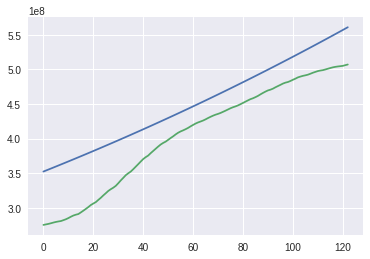

In [ ]:
#check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

<function matplotlib.pyplot.show>

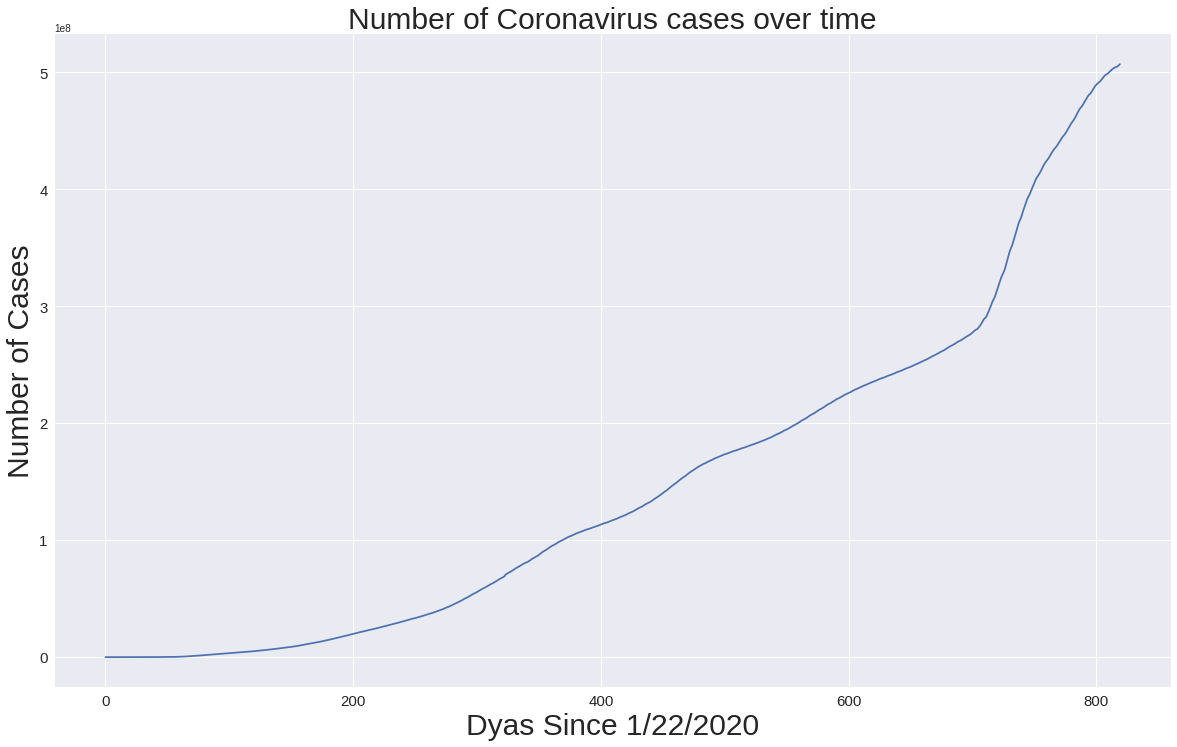

In [ ]:
# Total Number of coronavirus cases over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus cases over time', size=30)
plt.xlabel('Dyas Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

##**Graphing the SVM predictions along with the confirmed predictions**

Here we used matplotlib to graph our predictions along with what was confirmed and we were correct! Although not perfect the graphs were pretty similar to one another.

---



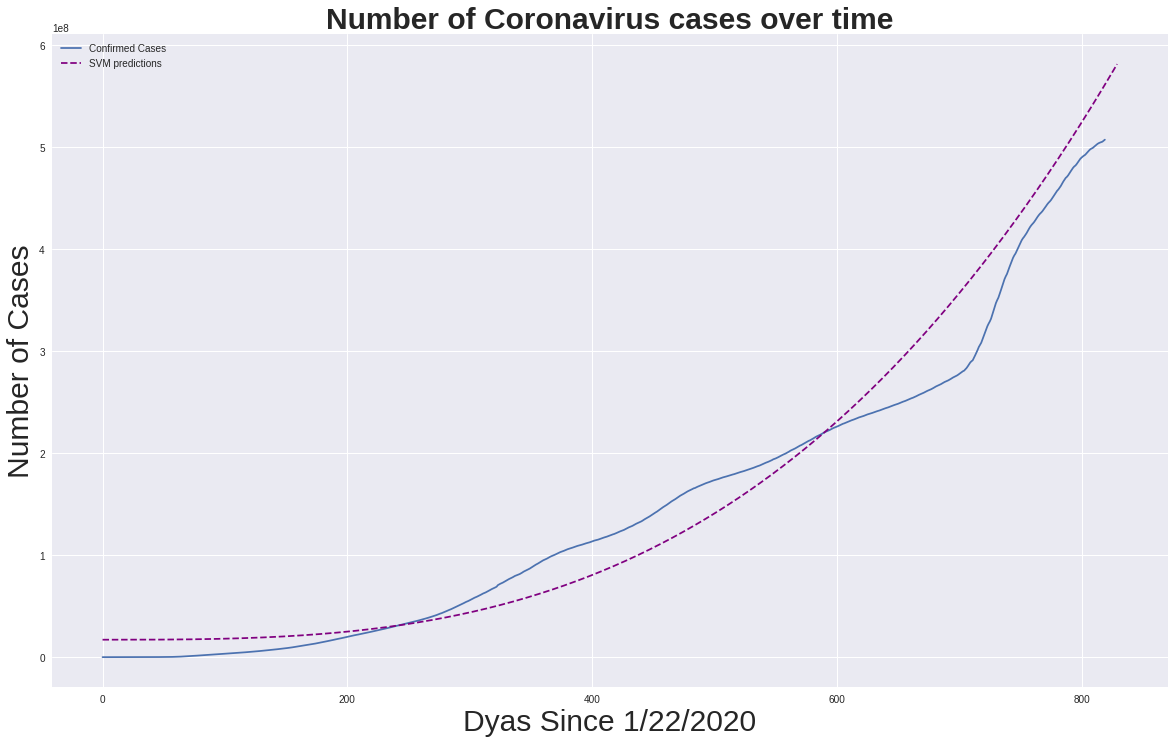

In [ ]:
#Confirmed vs Predicted cases

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus cases over time',size=30, fontweight="bold")
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])

In [ ]:
#predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('04/21/2022', 562904087.6029204),
 ('04/22/2022', 564903402.3693),
 ('04/23/2022', 566907593.510477),
 ('04/24/2022', 568916666.9665097),
 ('04/25/2022', 570930628.6768411),
 ('04/26/2022', 572949484.5806373),
 ('04/27/2022', 574973240.6177613),
 ('04/28/2022', 577001902.7277776),
 ('04/29/2022', 579035476.8502167),
 ('04/30/2022', 581073968.9247247)}

##**Training with Linear Regression**
Apart from SVM we also used linear regression to predict the growth of COVID. This is like finding the line of best fit.

In [ ]:
#Using Linear regression model to make predictions

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 124125007.60536076
MSE: 1.897944890720338e+16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


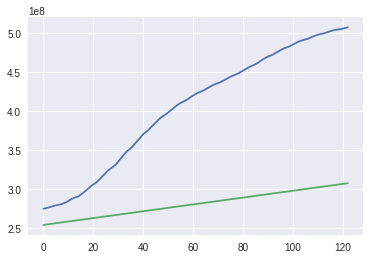

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

##**Graphing the Linear Regression predictions along with the confirmed predictions**

Here we used matplotlib to graph our predictions along with what was confirmed and we were correct! Although not perfect the graphs were pretty similar to one another.

---

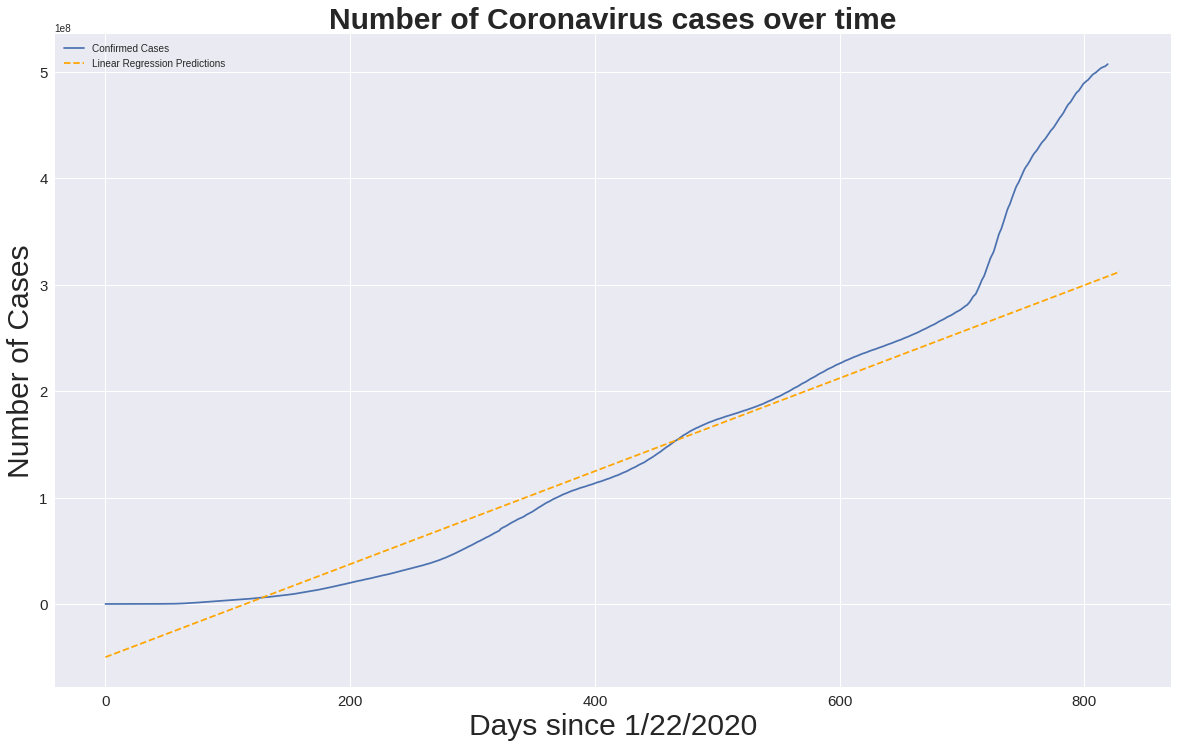

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus cases over time',size=30, fontweight="bold")
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#predictions for the next 10 days using linear regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[3.08175092e+08]
 [3.08611824e+08]
 [3.09048556e+08]
 [3.09485288e+08]
 [3.09922020e+08]
 [3.10358752e+08]
 [3.10795484e+08]
 [3.11232216e+08]
 [3.11668949e+08]
 [3.12105681e+08]]


##**More Outcomes and Graphs**

Apart from our predictions we also graphed multiple other graphs to visualize our code.

<function matplotlib.pyplot.show>

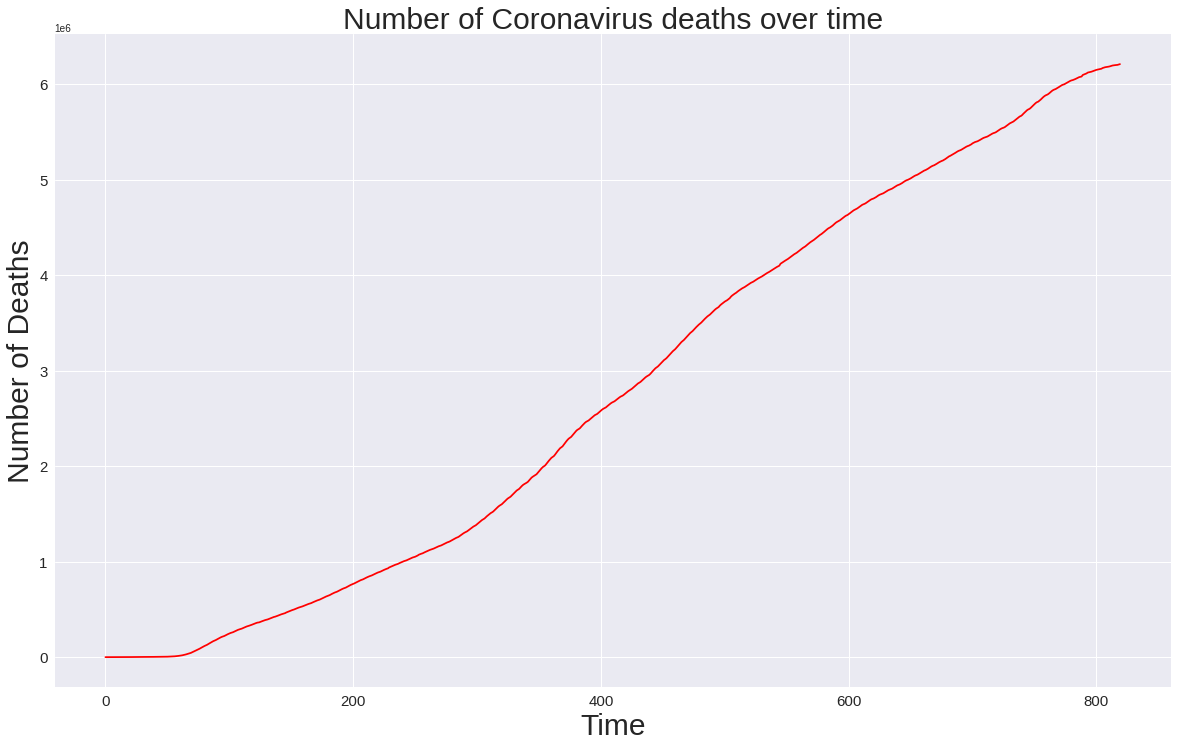

In [ ]:
# total deaths over time graph

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus deaths over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

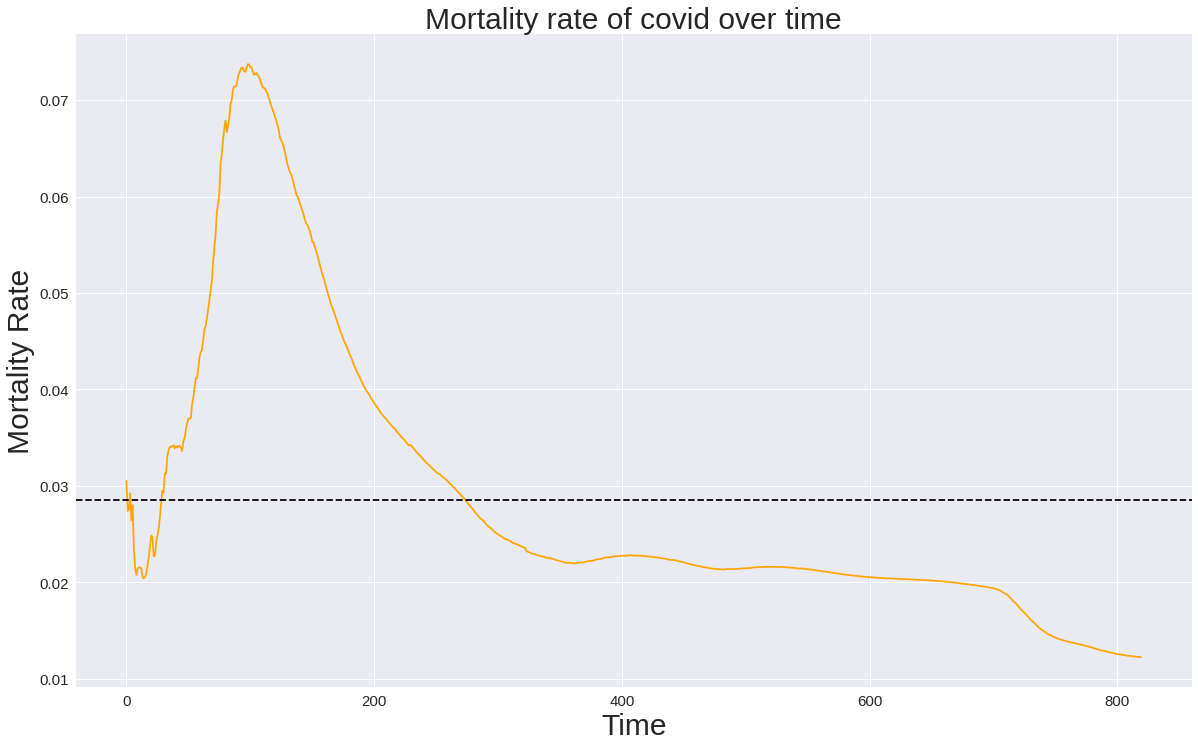

In [ ]:
#mortality rate

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality rate of covid over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

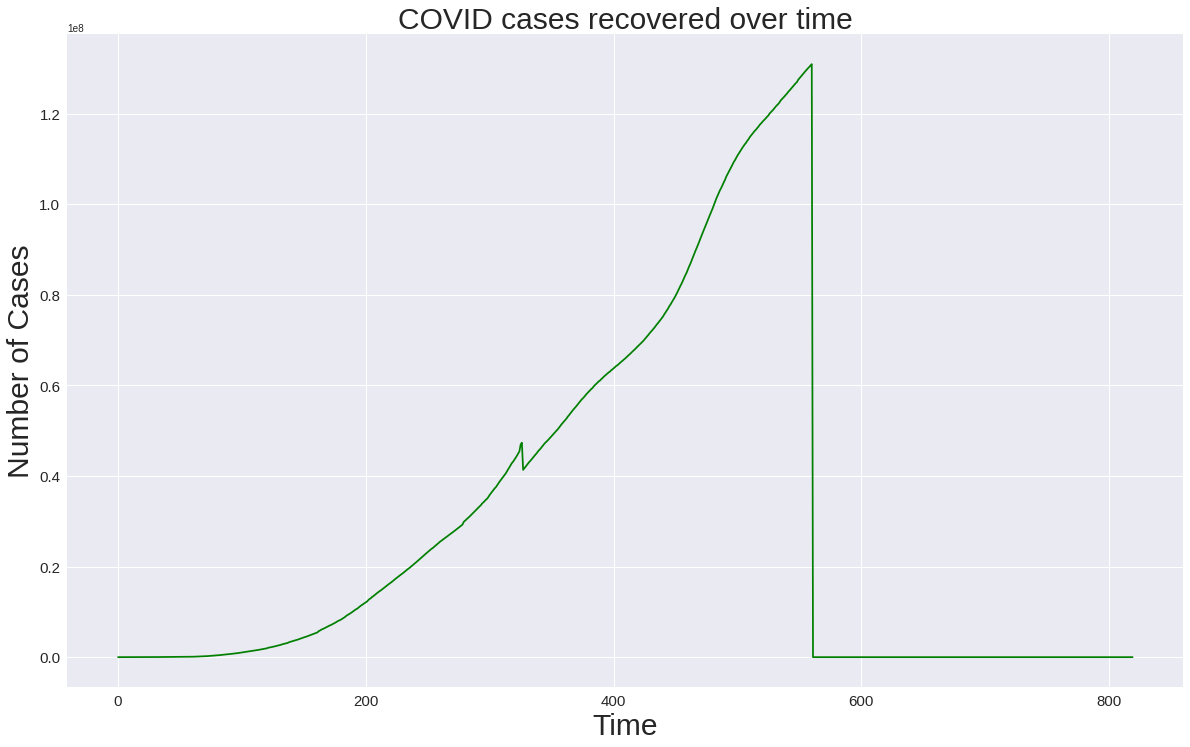

In [ ]:
#recovered over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('COVID cases recovered over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Data shows all zeroes after August 4th, so that is why the line drops to 0

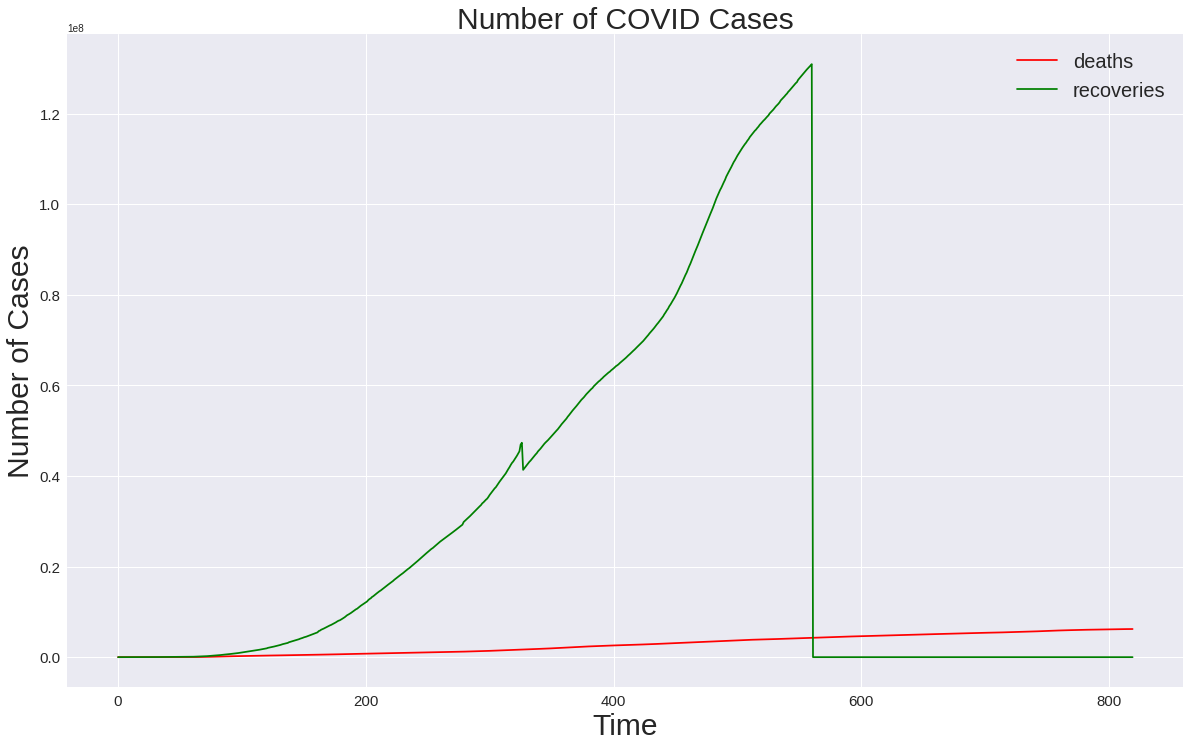

In [ ]:
# number of COVID cases recovered vs deaths over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of COVID Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Data shows all zeroes after August 4th, so that is why the line drops to 0
#Possible idea: we could fill in the data using regression: pass in the total cases and deaths and have a model figure out the recoveries

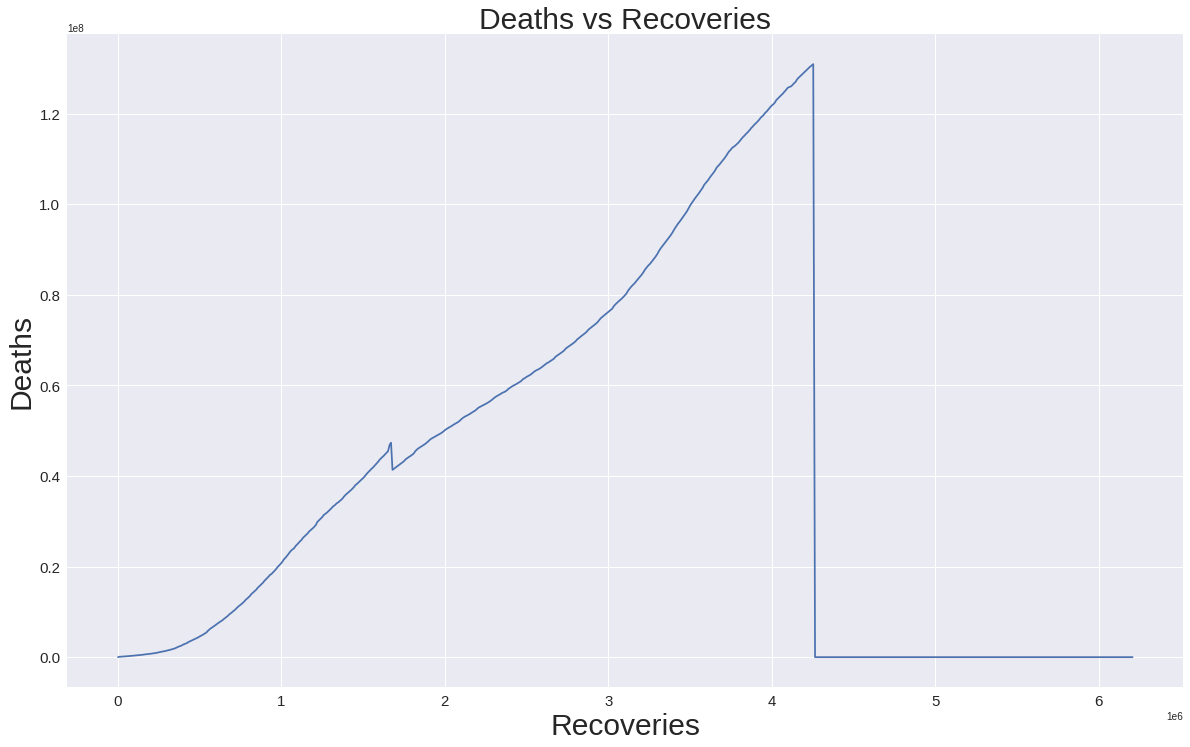

In [ ]:
#COVID deaths vs recoveries

plt.figure(figsize=(20, 12))
plt.plot(total_deaths, total_recovered)
plt.title('Deaths vs Recoveries', size=30)
plt.xlabel('Recoveries', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Data drops to zeroes after Aug 4th